In [21]:
import warnings
warnings.filterwarnings("ignore")

# SVM
###### svm可用于分类，回归，异常检测
<img src="./pic/large-margin-classification.png"  height="400" width="600" align="left"/>

###### 分割面不仅仅要2类分开，并且要保证间隔尽量远离

### 线性SVM分类
###### svm对特征范围敏感

### 软边缘分类（soft margin classification）

<img src="./pic/hard-margin-sensitive-to-outliers.png"  height="400" width="600" align="left"/>

###### 严格要求所有实例都远离『street』称为硬边缘分类（hard margin classification）如右图；
###### 它存在2个问题：
###### 1.只有在线性可分得数据上可用
###### 2.对于离群点非常敏感

###### 更有弹性的模型:软边缘分类
###### 它是找到一个尽可能大的『street』和限制 margin violcations （结果出现在街道中间甚至是错误的一边的实例）的平衡

In [22]:
# 在 sklearn的 svm 类中，使用超参 c 来控制，c越小『street』越宽，但是 margin violcations也越多。
# 如果 svm过拟合可以考虑减少 c,

<img src="./pic/fewer-margin-violcations-verus-large-margin.png"  height="400" width="600" align="left"/>

In [23]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:,(2,3)] #petal length,petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

In [24]:
svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svc",LinearSVC(C=0.1,loss="hinge"))
])
svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [25]:
svm_clf.predict([[5.5,1.7]])

array([ 1.])

In [26]:
# 可以使用 SVC(kernel="linear",C=1)但是运行很慢，不推荐；
# 还可以使用 SGDClassifier(loss="hinge",alpha=1/(m*C)),它使用梯度方式训练 svm,虽然收敛速度不如 linearSVC 快，但是可以在大规模数据集下使用

### 非线性SVM 分类

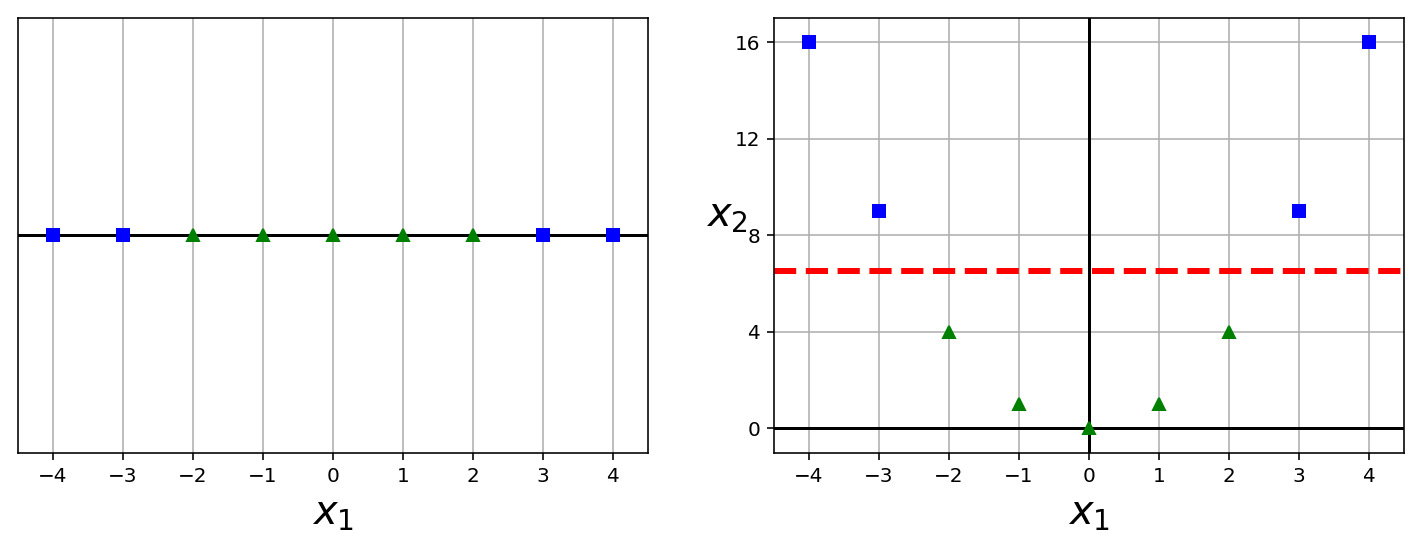

In [42]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

#save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

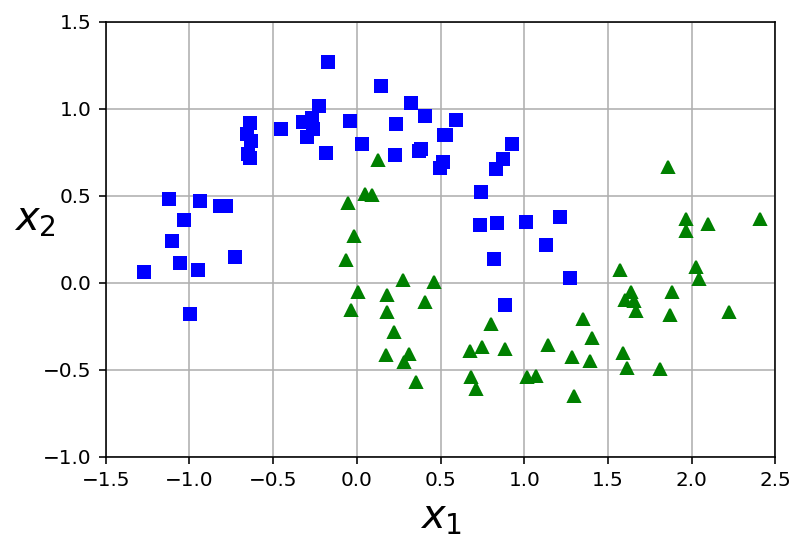

In [43]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [48]:
#from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline((
    ("poly_features",PolynomialFeatures(degree=3)),
    ("scaler",StandardScaler()),
    ("linear_svc",LinearSVC(C=10,loss="hinge"))
))
polynomial_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

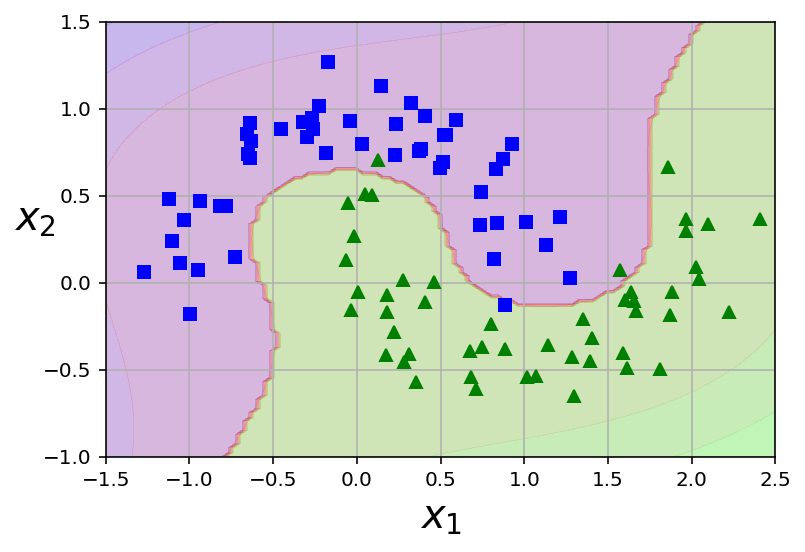

In [50]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

#save_fig("moons_polynomial_svc_plot")
plt.show()

###### 多项式和函数

In [59]:
from sklearn.svm import SVC
# 欠拟合增加 degree，过拟合减少它；coef0控制模型受高次和低次的影响成都
poly_kernel_svm_clf = Pipeline((
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="poly",degree=3,coef0=1,C=5))
))
poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [56]:
x0, x1 = np.meshgrid(x0s, x1s)

In [57]:
x0, x1

(array([[-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
          2.45959596,  2.5       ],
        [-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
          2.45959596,  2.5       ],
        [-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
          2.45959596,  2.5       ],
        ..., 
        [-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
          2.45959596,  2.5       ],
        [-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
          2.45959596,  2.5       ],
        [-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
          2.45959596,  2.5       ]]),
 array([[-1.        , -1.        , -1.        , ..., -1.        ,
         -1.        , -1.        ],
        [-0.97474747, -0.97474747, -0.97474747, ..., -0.97474747,
         -0.97474747, -0.97474747],
        [-0.94949495, -0.94949495, -0.94949495, ..., -0.94949495,
         -0.94949495, -0.94949495],
        ..., 
        [ 1.44949495,  1.44949495,  1.44949495, ...,

In [38]:
l.fit(X2,y)

LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)